In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Web Scraping

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
!pip install requests

In [4]:
import requests

In [5]:
base_url = "https://www.airlinequality.com/review-pages/latest-airline-reviews/"
pages = 270
page_size = 300

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 4 total reviews
Scraping page 2
   ---> 8 total reviews
Scraping page 3
   ---> 12 total reviews
Scraping page 4
   ---> 16 total reviews
Scraping page 5
   ---> 20 total reviews
Scraping page 6
   ---> 24 total reviews
Scraping page 7
   ---> 28 total reviews
Scraping page 8
   ---> 32 total reviews
Scraping page 9
   ---> 36 total reviews
Scraping page 10
   ---> 40 total reviews
Scraping page 11
   ---> 44 total reviews
Scraping page 12
   ---> 48 total reviews
Scraping page 13
   ---> 52 total reviews
Scraping page 14
   ---> 56 total reviews
Scraping page 15
   ---> 60 total reviews
Scraping page 16
   ---> 64 total reviews
Scraping page 17
   ---> 68 total reviews
Scraping page 18
   ---> 72 total reviews
Scraping page 19
   ---> 76 total reviews
Scraping page 20
   ---> 80 total reviews
Scraping page 21
   ---> 84 total reviews
Scraping page 22
   ---> 88 total reviews
Scraping page 23
   ---> 92 total reviews
Scraping page 24
   ---> 96 total reviews
Scr

In [6]:
df = pd.DataFrame()
df["reviews"] = reviews

In [7]:
df.sample(7)

,reviews
461,"✅ Trip Verified | Flight on time, arrival on t..."
757,"✅ Trip Verified | Flight on time, arrival on t..."
714,✅ Trip Verified | Ground personnel was rude. T...
1014,✅ Trip Verified | Ground personnel was rude. T...
1071,Not Verified | The airline staff in Jeddah mad...
817,"✅ Trip Verified | Flight on time, arrival on t..."
583,Not Verified | The airline staff in Jeddah mad...


In [8]:
df.describe()

,reviews
count,1080
unique,4
top,
freq,270


df.to_csv("BA_reviews.csv")

In [9]:
df.shape

(1080, 1)

In [25]:
df

,reviews
0,
1,"✅ Trip Verified | Flight on time, arrival on t..."
2,✅ Trip Verified | Ground personnel was rude. T...
3,Not Verified | The airline staff in Jeddah mad...
4,
...,...
1075,Not Verified | The airline staff in Jeddah mad...
1076,
1077,"✅ Trip Verified | Flight on time, arrival on t..."
1078,✅ Trip Verified | Ground personnel was rude. T...


Data Cleaning

In [141]:
df.reviews= df.reviews.str.split('|',expand=True)

In [142]:
df

,reviews
0,None
1,"Flight on time, arrival on time, the only dow..."
2,Ground personnel was rude. They charged $35.0...
3,The airline staff in Jeddah made more than on...
4,None
...,...
1075,The airline staff in Jeddah made more than on...
1076,None
1077,"Flight on time, arrival on time, the only dow..."
1078,Ground personnel was rude. They charged $35.0...


In [143]:
df = df.dropna()

In [144]:
df

,reviews
1,"Flight on time, arrival on time, the only dow..."
2,Ground personnel was rude. They charged $35.0...
3,The airline staff in Jeddah made more than on...
5,"Flight on time, arrival on time, the only dow..."
6,Ground personnel was rude. They charged $35.0...
...,...
1074,Ground personnel was rude. They charged $35.0...
1075,The airline staff in Jeddah made more than on...
1077,"Flight on time, arrival on time, the only dow..."
1078,Ground personnel was rude. They charged $35.0...


In [145]:
import nltk

In [146]:
from nltk.corpus import stopwords
stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [147]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [148]:
# Lower case convertor
def text_transform (text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i) 
    text = y[:]
    y.clear()
# stopwords removal
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    test = y[:]
    y.clear()
# stemming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)


In [149]:
df['Transformed Text'] = df['reviews'].apply(text_transform)

C:\Users\Sanjana\AppData\Local\Temp\ipykernel_10264\1090344829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed Text'] = df['reviews'].apply(text_transform)


In [150]:
df

,reviews,Transformed Text
1,"Flight on time, arrival on time, the only dow...",flight on time arriv on time the onli downsid ...
2,Ground personnel was rude. They charged $35.0...,ground personnel wa rude they charg per carri ...
3,The airline staff in Jeddah made more than on...,the airlin staff in jeddah made more than one ...
5,"Flight on time, arrival on time, the only dow...",flight on time arriv on time the onli downsid ...
6,Ground personnel was rude. They charged $35.0...,ground personnel wa rude they charg per carri ...
...,...,...
1074,Ground personnel was rude. They charged $35.0...,ground personnel wa rude they charg per carri ...
1075,The airline staff in Jeddah made more than on...,the airlin staff in jeddah made more than one ...
1077,"Flight on time, arrival on time, the only dow...",flight on time arriv on time the onli downsid ...
1078,Ground personnel was rude. They charged $35.0...,ground personnel wa rude they charg per carri ...


In [193]:
df.sample(8)

,reviews,Transformed Text,pos_tags
11,The airline staff in Jeddah made more than on...,the airlin staff in jeddah made more than one ...,"[(the, DT), (airlin, JJ), (staff, NN), (in, IN..."
115,The airline staff in Jeddah made more than on...,the airlin staff in jeddah made more than one ...,"[(the, DT), (airlin, JJ), (staff, NN), (in, IN..."
78,Ground personnel was rude. They charged $35.0...,ground personnel wa rude they charg per carri ...,"[(ground, NN), (personnel, NNS), (wa, VBP), (r..."
815,The airline staff in Jeddah made more than on...,the airlin staff in jeddah made more than one ...,"[(the, DT), (airlin, JJ), (staff, NN), (in, IN..."
338,Ground personnel was rude. They charged $35.0...,ground personnel wa rude they charg per carri ...,"[(ground, NN), (personnel, NNS), (wa, VBP), (r..."
1049,"Flight on time, arrival on time, the only dow...",flight on time arriv on time the onli downsid ...,"[(flight, NN), (on, IN), (time, NN), (arriv, N..."
705,"Flight on time, arrival on time, the only dow...",flight on time arriv on time the onli downsid ...,"[(flight, NN), (on, IN), (time, NN), (arriv, N..."
1021,"Flight on time, arrival on time, the only dow...",flight on time arriv on time the onli downsid ...,"[(flight, NN), (on, IN), (time, NN), (arriv, N..."


In [194]:
data = df

In [196]:
data.head()

,reviews,Transformed Text,pos_tags
1,"Flight on time, arrival on time, the only dow...",flight on time arriv on time the onli downsid ...,"[(flight, NN), (on, IN), (time, NN), (arriv, N..."
2,Ground personnel was rude. They charged $35.0...,ground personnel wa rude they charg per carri ...,"[(ground, NN), (personnel, NNS), (wa, VBP), (r..."
3,The airline staff in Jeddah made more than on...,the airlin staff in jeddah made more than one ...,"[(the, DT), (airlin, JJ), (staff, NN), (in, IN..."
5,"Flight on time, arrival on time, the only dow...",flight on time arriv on time the onli downsid ...,"[(flight, NN), (on, IN), (time, NN), (arriv, N..."
6,Ground personnel was rude. They charged $35.0...,ground personnel wa rude they charg per carri ...,"[(ground, NN), (personnel, NNS), (wa, VBP), (r..."


In [197]:
data = data.drop('pos_tags',axis = 1)

In [198]:
data.head()

,reviews,Transformed Text
1,"Flight on time, arrival on time, the only dow...",flight on time arriv on time the onli downsid ...
2,Ground personnel was rude. They charged $35.0...,ground personnel wa rude they charg per carri ...
3,The airline staff in Jeddah made more than on...,the airlin staff in jeddah made more than one ...
5,"Flight on time, arrival on time, the only dow...",flight on time arriv on time the onli downsid ...
6,Ground personnel was rude. They charged $35.0...,ground personnel wa rude they charg per carri ...


In [222]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Sentiment analysis using TextBlob
data[['polarity', 'subjectivity']] = data['reviews'].apply(lambda text: pd.Series(TextBlob(text).sentiment))

# Sentiment analysis using VaderSentiment
analyzer = SentimentIntensityAnalyzer()
for index, row in data['reviews'].iteritems():
    score = analyzer.polarity_scores(row)
    
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if pos > neg:
        data.loc[index, 'sentiment'] = 'Negative'
    else:
        data.loc[index, 'sentiment'] = 'Positive'
    


In [227]:
data.sample(7)

,reviews,Transformed Text,polarity,subjectivity,sentiment
577,"Flight on time, arrival on time, the only dow...",flight on time arriv on time the onli downsid ...,0.0250,0.675000,Positive
1,"Flight on time, arrival on time, the only dow...",flight on time arriv on time the onli downsid ...,0.0250,0.675000,Positive
183,The airline staff in Jeddah made more than on...,the airlin staff in jeddah made more than one ...,0.2375,0.383333,Positive
550,Ground personnel was rude. They charged $35.0...,ground personnel wa rude they charg per carri ...,0.2750,0.600000,Negative
827,The airline staff in Jeddah made more than on...,the airlin staff in jeddah made more than one ...,0.2375,0.383333,Positive
249,"Flight on time, arrival on time, the only dow...",flight on time arriv on time the onli downsid ...,0.0250,0.675000,Positive
267,The airline staff in Jeddah made more than on...,the airlin staff in jeddah made more than one ...,0.2375,0.383333,Positive


In [230]:
data.shape

(810, 5)

In [234]:
rates = data['sentiment'].value_counts() 

In [235]:
rates

Positive    540
Negative    270
Name: sentiment, dtype: int64

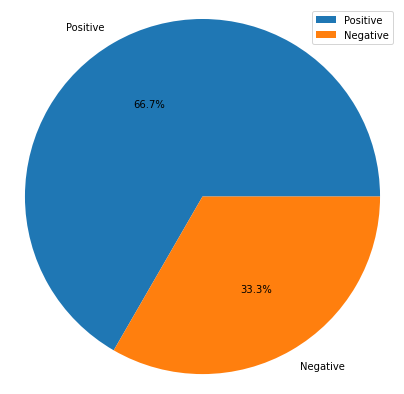

In [265]:
plt.figure(figsize=(7,7))
plt.pie(rates,labels=rates.index,autopct='%1.1f%%')
plt.legend()
plt.axis('equal')
plt.show()

In [274]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [276]:
data['sentiment']=le.fit_transform(data['sentiment'])

In [278]:
data['sentiment'].sample(7)

382     0
665     1
1027    1
447     1
761     1
579     1
235     1
Name: sentiment, dtype: int32

In [279]:
# Most Repeated words in positive oriented reviews
filtered_df = data[data['sentiment'] == 1]

In [280]:
text = ' '.join(filtered_df['Transformed Text'].tolist())

In [281]:
from nltk.tokenize import word_tokenize

words = word_tokenize(text)

In [282]:
word_counts = {}
for word in words:
    if word not in word_counts:
        word_counts[word] = 1
    else:
        word_counts[word] += 1

In [283]:
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

In [343]:
for word, count in sorted_words[:]: 
    print(f'{word}: {count}')

they: 810
carri: 540
on: 540
in: 540
is: 540
ground: 270
personnel: 270
wa: 270
rude: 270
charg: 270
per: 270
when: 270
say: 270
that: 270
most: 270
of: 270
their: 270
flight: 270
allow: 270
free: 270
the: 270
check: 270
process: 270
through: 270
machin: 270
and: 270
custom: 270
servic: 270
read: 270
more: 270


In [287]:
# Most Repeated words in negative oriented reviews
filtered_df = data[data['sentiment'] == 0]

In [337]:
text = ' '.join(filtered_df['Transformed Text'].tolist())

In [338]:
words = word_tokenize(text)

In [339]:
word_counts = {}
for word in words:
    if word not in word_counts:
        word_counts[word] = 1
    else:
        word_counts[word] += 1

In [340]:
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

In [341]:
for word, count in sorted_words[:30]: 
    print(f'{word}: {count}')

they: 810
carri: 540
on: 540
in: 540
is: 540
ground: 270
personnel: 270
wa: 270
rude: 270
charg: 270
per: 270
when: 270
say: 270
that: 270
most: 270
of: 270
their: 270
flight: 270
allow: 270
free: 270
the: 270
check: 270
process: 270
through: 270
machin: 270
and: 270
custom: 270
servic: 270
read: 270
more: 270


In [330]:
sns.barplot(data=data,x=df['sentiment']==1)

KeyError: 'sentiment'

In [322]:
import seaborn as sns